# Geometria Obliczeniowa
#### Oscar Teeninga 

Ćwiczenie wprowadzające w zagadnienia geometrii obliczeniowej – implementacja podstawowych predykatów geometrycznych, przeprowadzenie testów, wizualizacja i opracowanie wyników.

## Biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

## Generowanie zbiorów
Do wygenerowania zbiorów użyłem najprostrzej metody, która intuizycjnie się narzuca w przypadku tego zadania.

In [2]:
precision = np.float

def gen_plane_point(min, max):
    a = precision(np.random.uniform(min, max))
    b = precision(np.random.uniform(min, max))
    return (a, b, 1)

def gen_circle_point(max_r):
    fi = np.random.uniform(0.0, 2*math.pi)
    a = precision(max_r*math.cos(fi))
    b = precision(max_r*math.sin(fi))
    return (a, b, 1)

def gen_vector_points(vector, min, max):
    x = np.random.uniform(min, max)
    y = vector(x)
    return (x, y, 1)

In [3]:
points_square = np.array([gen_plane_point(-1000, 1000) for _ in range(100000)])
points_big_square = np.array([gen_plane_point(-10e14, 10e14) for _ in range(100000)])
points_circle = np.array([gen_circle_point(100) for _ in range(1000)])
points_vector = np.array([gen_vector_points(lambda x: 0.05*x + 0.05, -1000, 1000) for _ in range(100000)])

## Wizualizacja graficzna zbiorów
Uruchom wizualizację graficzną utworzonych zbiorów punktów.

In [7]:
ab = lambda x: x*0.05+0.05

def plot_set(x, y, min_x, max_x, size=0.5):
    plt.figure(figsize=(12,12))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.scatter(x,y, color="magenta", s=size)
    plt.plot([min_x, max_x], [ab(min_x), ab(max_x)])
    plt.show()

### Zbiór A
Zbiór 10e5 losowych punktów o współrzędnych z przedziału [-1000, 1000]

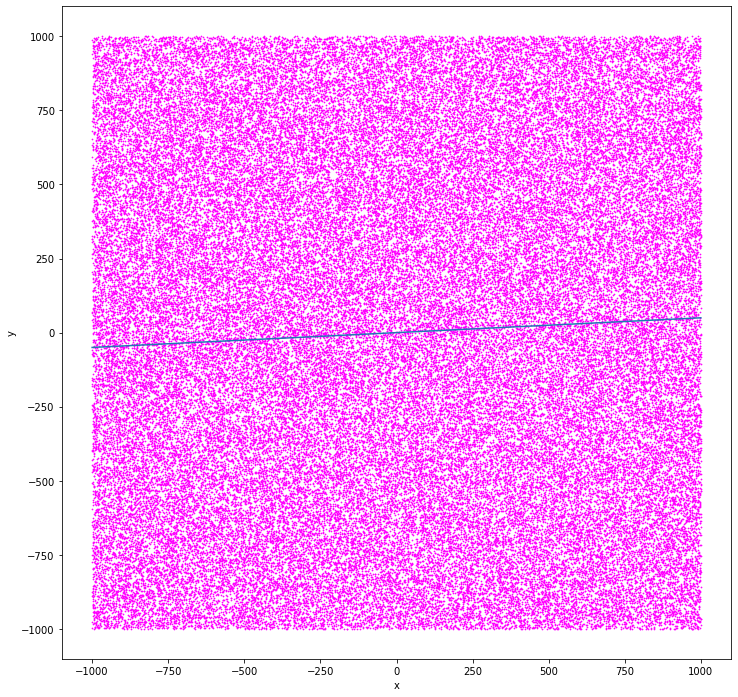

In [8]:
x,y,z = points_square.T
plot_set(x, y, -1000, 1000)

### Zbiór B
Zbiór 10e5 losowych punktów o wspołrzędnych z przedziału [-10e14, 10e14]

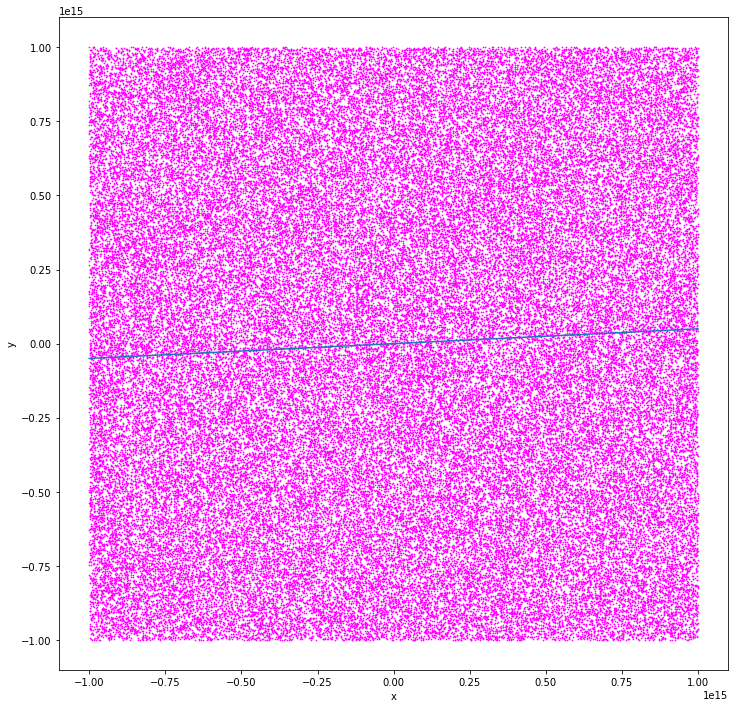

In [9]:
x,y,z = points_big_square.T
plot_set(x, y, -10e14, 10e14)

### Zbiór C
Zbiór 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,

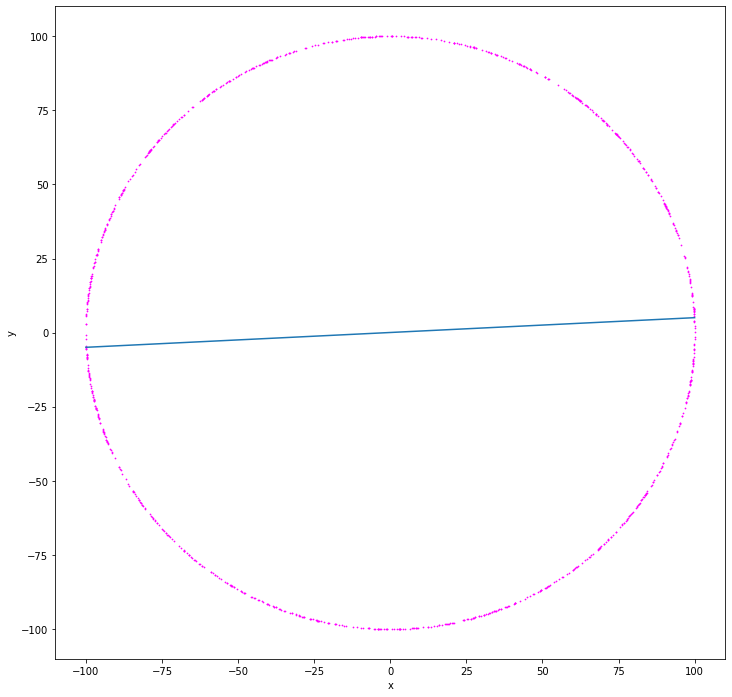

In [11]:
x,y,z = points_circle.T
plot_set(x, y, -100, 100, size=0.5)

### Zbiór D
Zbiór 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor (a, b),
przyjmij a = [-1.0, 0.0], b = [1.0, 0.1].

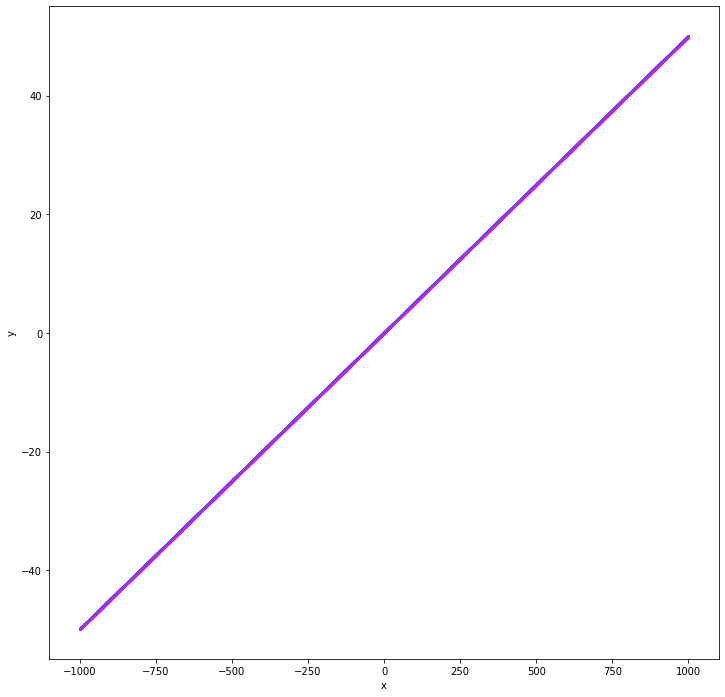

In [13]:
x,y,z = points_vector.T
plot_set(x, y, -1000, 1000)

## Podział względem orientacji
Przygotuj program, który dla każdego ze zbioru danych dokona podziału punktów względem ich orientacji w stosunku do odcinka ab ( a = [-1.0, 0.0], b = [1.0, 0.1] – punkty znajdujące się po lewej stronie, po prawej stronie oraz współliniowe.

### Obliczanie wyznacznika
Obliczenia wykonaj przy pomocy wyznacznika (1) i następnie (2) zaimplementowanego samodzielnie.

<img src="lab1.png" width="600">

In [15]:
def det_1(a, b, c): 
    return a[0]*b[1]*c[2]+b[0]*c[1]*a[2]+c[0]*a[1]*b[2]-a[2]*b[1]*c[0]-b[2]*c[1]*a[0]-c[2]*a[1]*b[0]
    
def det_2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

def det_lib_1(a, b, c):
    return np.linalg.det([a,b,c])

def det_lib_2(a, b, c):
    ac = [a[0]-c[0], a[1]-c[1]]
    bc = [b[0]-c[0], b[1]-c[1]]
    return np.linalg.det([ac, bc])

Punkty a i b wyznaczające wektor ab

In [16]:
a = [-1.0, 0.0, 1.0]
b = [1.0, 0.1, 1.0]

Metody transformujące wektory i abstrachujące analizę

In [17]:
def dets(points, det):
    det_points = [det(a, b, x) for x in points]
    return det_points

def signs(det_points):
    def sign(x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        else:
            return 0
            
    sgn_det_points = [sign(x) for x in det_points]
    return sgn_det_points


def difference(points_A, points_B):
    return [1 if points_A[i] != points_B[i] else 0 for i in range(len(points_A))]

def analiza(points, det_a, det_b, name_a, name_b):
    print(name_a + " i " + name_b)
    det_a_points = dets(points, det_a)
    det_b_points = dets(points, det_b)
    diff = sum(difference(det_b_points, det_a_points))
    print("Liczba różnych wyznaczników: " + str(diff))
    s1 = signs(dets(points, det_a))
    s2 = signs(dets(points, det_b))
    s = difference(s1, s2)
    sgn_diff = sum(s)
    print("Liczba różnych orientacji: " + str(sgn_diff) + "\n")
    
def full_analiza(points, dets, names):
    for i in range(len(dets)):
        for j in range(i+1, len(dets)):
            analiza(points, dets[i], dets[j], names[i], names[j])
            
def all_full_analiza(points_sets, set_names, dets_set, dets_names):
    results = {}
    for i in range(len(set_names)):
        print("==================================")
        print("Zbiór " + set_names[i] + "\n")
        full_analiza(points_sets[i], dets_set, dets_names)
        print("==================================\n\n")
            
dets_set = [det_1, det_2, det_lib_1, det_lib_2]
dets_names = ["Własne 3D", "Własne 2D", "Biblioteczne 3D", "Biblioteczne 2D"]
set_names = ["A", "B", "C", "D"]
points_sets = [points_square, points_big_square, points_circle, points_vector]

### Porównanie wyników
Na początku sprawdziłem ile orientacji dla każdego zbioru różni się między sobą

In [19]:
all_full_analiza(points_sets[0:2], set_names[0:2], dets_set, dets_names)

Zbiór A

Własne 3D i Własne 2D
Liczba różnych wyznaczników: 98541
Liczba różnych orientacji: 0

Własne 3D i Biblioteczne 3D
Liczba różnych wyznaczników: 87497
Liczba różnych orientacji: 0

Własne 3D i Biblioteczne 2D
Liczba różnych wyznaczników: 99243
Liczba różnych orientacji: 0

Własne 2D i Biblioteczne 3D
Liczba różnych wyznaczników: 99227
Liczba różnych orientacji: 0

Własne 2D i Biblioteczne 2D
Liczba różnych wyznaczników: 99265
Liczba różnych orientacji: 0

Biblioteczne 3D i Biblioteczne 2D
Liczba różnych wyznaczników: 95797
Liczba różnych orientacji: 0



Zbiór B

Własne 3D i Własne 2D
Liczba różnych wyznaczników: 100000
Liczba różnych orientacji: 79

Własne 3D i Biblioteczne 3D
Liczba różnych wyznaczników: 98294
Liczba różnych orientacji: 0

Własne 3D i Biblioteczne 2D
Liczba różnych wyznaczników: 100000
Liczba różnych orientacji: 79

Własne 2D i Biblioteczne 3D
Liczba różnych wyznaczników: 100000
Liczba różnych orientacji: 79

Własne 2D i Biblioteczne 2D
Liczba różnych wyznacz

In [22]:
def plot_orientation(dataset, min_x, max_x, det_f, size=0.1):
    s = signs(dets(dataset, det_f))
    x_d, y_d, z_d = np.array([dataset[x] for x in range(len(dataset)) if s[x] == 1]).T
    x_m, y_m, z_m = np.array([dataset[x] for x in range(len(dataset)) if s[x] == -1]).T
    plt.figure(figsize=(12,12))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.scatter(x_d,y_d, color="green", s=size)
    plt.scatter(x_m,y_m, color="red", s=size)
    plt.plot([min_x, max_x], [ab(min_x), ab(max_x)])
    plt.show()
    
def plot_orientation_diff(dataset, min_x, max_x, det_f1, det_f2, size=0.1):
    s1 = signs(dets(dataset, det_f1))
    s2 = signs(dets(dataset, det_f2))
    s = difference(s1, s2)
    if (sum(s) == 0):
        print("Brak różnic")
    else:
        print("Liczba roznych orientacji: " + str(sum(s)))
        x, y, z = np.array([dataset[x] if s[x] == 1 else (None, None, None) for x in range(len(dataset))]).T
        plt.figure(figsize=(12,12))
        plt.ylabel('y')
        plt.xlabel('x')
        plt.scatter(x, y, color="magenta", s=size)
        plt.plot([min_x, max_x], [ab(min_x), ab(max_x)])
        plt.show()

### Wizualizacja orientacji oraz punktów różnie zakwalifikowanych

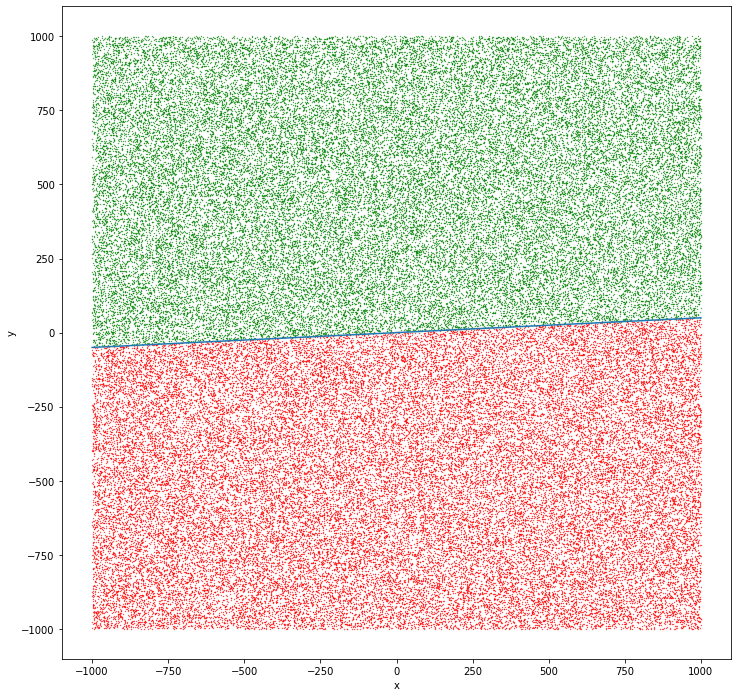

Brak różnic


In [27]:
plot_orientation(points_square, -1000, 1000, det_lib_2)
plot_orientation_diff(points_square, -1000, 1000, det_1, det_2, size=10)

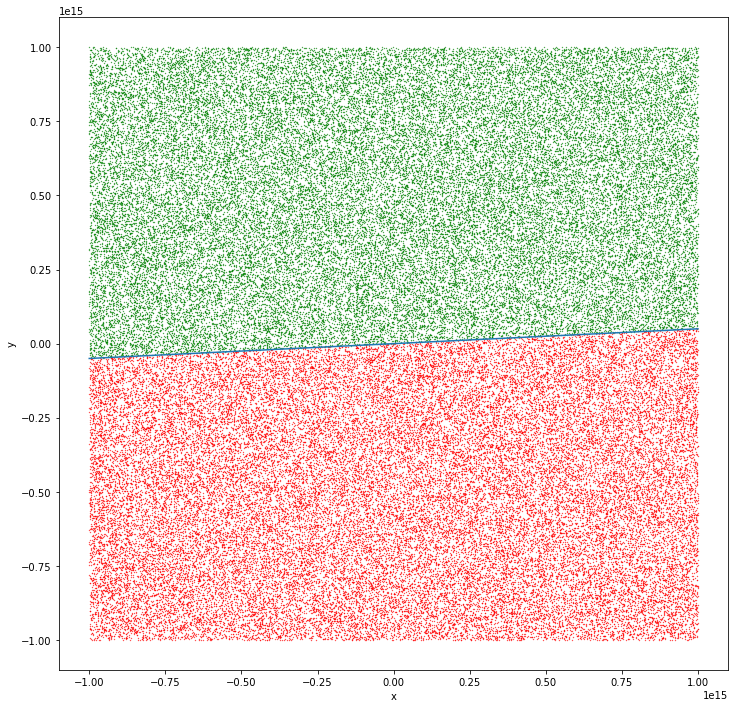

Liczba roznych orientacji: 79


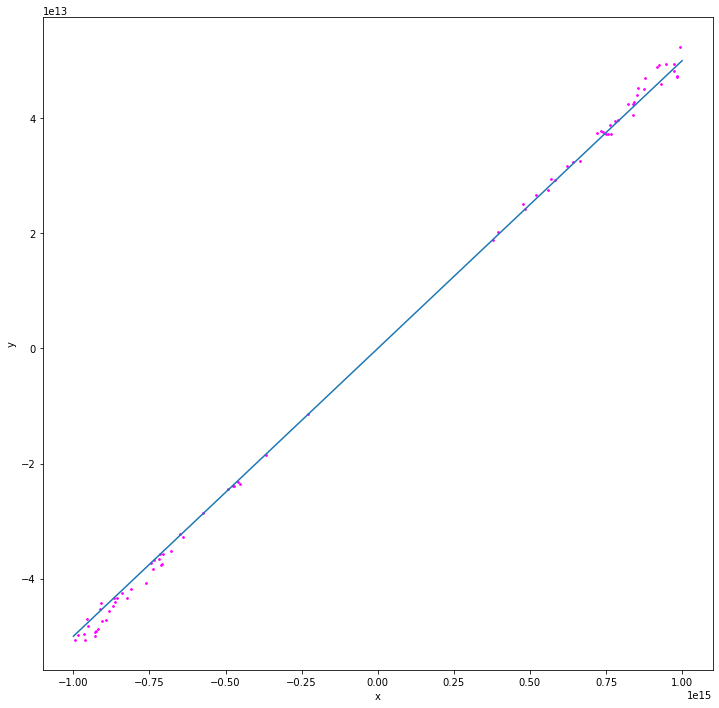

In [28]:
plot_orientation(points_big_square, -10e14, 10e14, det_1)
plot_orientation_diff(points_big_square, -10e14, 10e14, det_lib_1, det_lib_2, size = 3)

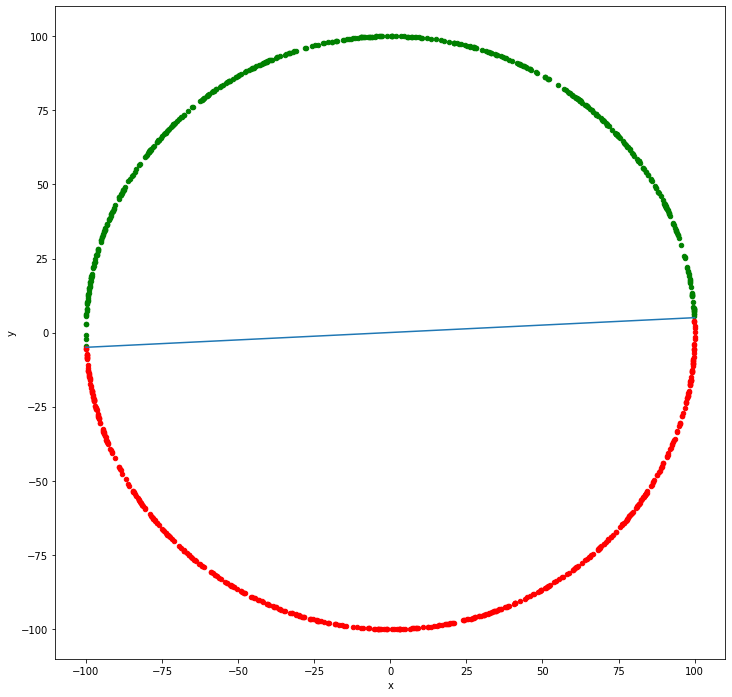

Brak różnic


In [29]:
plot_orientation(points_circle, -100, 100, det_lib_2, 20)
plot_orientation_diff(points_circle, -100, 100, det_lib_1, det_lib_2, size = 3)

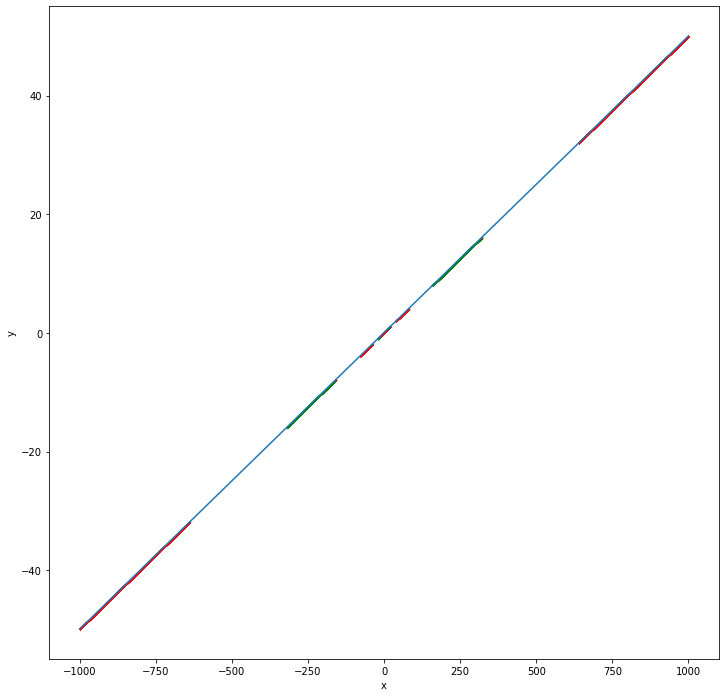

Liczba roznych orientacji: 68356


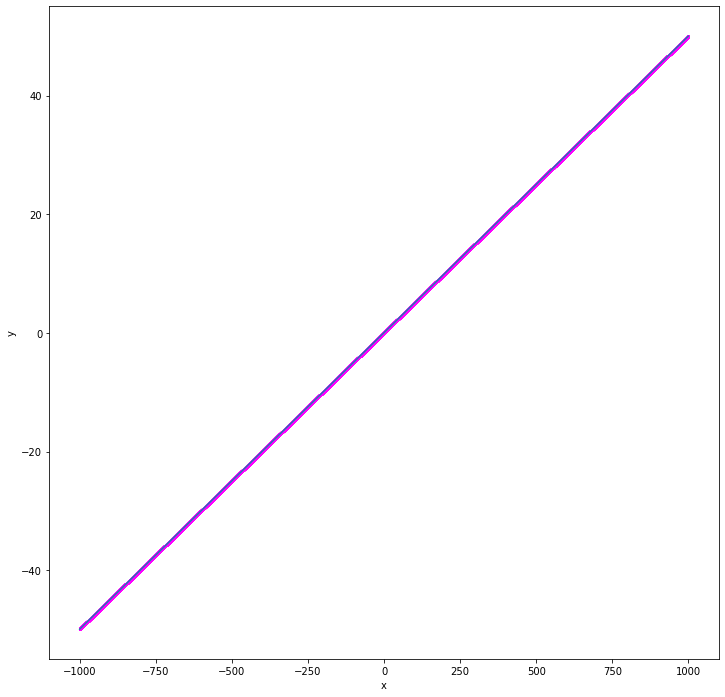

In [30]:
plot_orientation(points_vector, -1000, 1000, det_1)
plot_orientation_diff(points_vector, -1000, 1000, det_lib_1, det_lib_2, size = 3)